In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [70]:
training_set=pd.read_csv("C:/Users/MohamedIsmail/Desktop/TSLA_Train.csv")
training_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-22,177.809998,180.320007,174.759995,178.559998,178.559998,7022600
1,2014-01-23,177.229996,182.380005,173.419998,181.500000,181.500000,7867400
2,2014-01-24,177.850006,180.479996,173.529999,174.600006,174.600006,7664300
3,2014-01-27,175.160004,177.919998,164.710007,169.619995,169.619995,8716400
4,2014-01-28,171.500000,178.979996,171.000000,178.380005,178.380005,6093400


In [71]:
training_set=training_set.iloc[:,1:2]
training_set.head()

,Open
0,177.809998
1,177.229996
2,177.850006
3,175.160004
4,171.500000


In [72]:
training_set=training_set.values

In [73]:
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [74]:
len(training_set)

505

In [75]:
X_train=training_set[0:504]
y_train=training_set[1:505]

today=pd.DataFrame(X_train[0:5])
tomorrow=pd.DataFrame(y_train[0:5])
ex=pd.concat([today,tomorrow],axis=1)
ex.columns=(['today','tomorrow'])
ex

,today,tomorrow
0,0.054317,0.049324
1,0.049324,0.054661
2,0.054661,0.031506
3,0.031506,0.000000
4,0.000000,0.032711


In [76]:
X_train=np.reshape(X_train,(504,1,1))

In [77]:
regressor=Sequential() #Initialize the RNN

In [78]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1))) #Adding input and hidden layer

In [79]:
regressor.add(Dense(units=1)) #Add OutputLayer

In [80]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [81]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
504/504 [==============================] - 3s 6ms/step - loss: 0.4480A: 2s -
Epoch 2/200
504/504 [==============================] - 4s 8ms/step - loss: 0.3967
Epoch 3/200
504/504 [==============================] - 5s 11ms/step - loss: 0.3500
Epoch 4/200
504/504 [==============================] - 5s 11ms/step - loss: 0.3077
Epoch 5/200
504/504 [==============================] - 5s 9ms/step - loss: 0.2699
Epoch 6/200
504/504 [==============================] - 5s 9ms/step - loss: 0.2362
Epoch 7/200
504/504 [==============================] - 4s 9ms/step - loss: 0.2067
Epoch 8/200
504/504 [==============================] - 6s 12ms/step - loss: 0.1802
Epoch 9/200
504/504 [==============================] - 5s 10ms/step - loss: 0.1571
Epoch 10/200
504/504 [==============================] - 5s 9ms/step - loss: 0.1371
Epoch 11/200
504/504 [==============================] - 5s 11ms/step - loss: 0.1196
Epoch 12/200
504/504 [==============================] - 5s 9ms/step - loss: 0.1049
E

504/504 [==============================] - 4s 8ms/step - loss: 0.0226
Epoch 100/200
504/504 [==============================] - 4s 9ms/step - loss: 0.0224
Epoch 101/200
504/504 [==============================] - 5s 11ms/step - loss: 0.0222
Epoch 102/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0220
Epoch 103/200
504/504 [==============================] - 5s 9ms/step - loss: 0.0218
Epoch 104/200
504/504 [==============================] - 4s 9ms/step - loss: 0.0215
Epoch 105/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0213
Epoch 106/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0211
Epoch 107/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0209
Epoch 108/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0207
Epoch 109/200
504/504 [==============================] - 4s 9ms/step - loss: 0.0205
Epoch 110/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0203

Epoch 196/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0050
Epoch 197/200
504/504 [==============================] - 6s 11ms/step - loss: 0.0049
Epoch 198/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0048
Epoch 199/200
504/504 [==============================] - 5s 9ms/step - loss: 0.0048
Epoch 200/200
504/504 [==============================] - 5s 10ms/step - loss: 0.0047


In [82]:
test_set=pd.read_csv("C:/Users/MohamedIsmail/Desktop/TSLA_Test.csv")

In [83]:
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,214.860001,220.330002,210.960007,216.990005,216.990005,5923300
1,2017-01-04,214.750000,228.000000,214.309998,226.990005,226.990005,11213500
2,2017-01-05,226.419998,227.479996,221.949997,226.750000,226.750000,5911700
3,2017-01-06,226.929993,230.309998,225.449997,229.009995,229.009995,5527900
4,2017-01-09,228.970001,231.919998,228.000000,231.279999,231.279999,3957000


In [84]:
real_stock_price=test_set.iloc[:,1:2]
real_stock_price.head()

,Open
0,214.860001
1,214.750000
2,226.419998
3,226.929993
4,228.970001


In [85]:
real_stock_price=real_stock_price.values

In [87]:
inputs=real_stock_price
inputs=sc.transform(inputs)
inputs=np.reshape(inputs,(265,1,1))
predicted_stock_price=regressor.predict(inputs)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

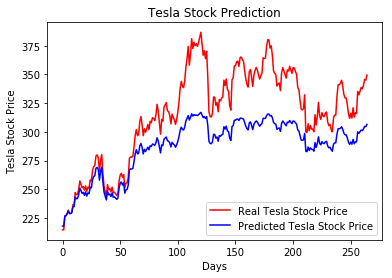

In [88]:
plt.plot(real_stock_price,color='red',label='Real Tesla Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()